# Optimal pressure 


In [4]:
import numpy as np
import matplotlib.pyplot as plt

**Incremental sales curve**

The Hill function is one method to helps us understand how incremental sales change with ad frequency, capturing the diminishing returns effect.

$$Hill(F,K,S) =\frac{F^S}{F^S+K^S}$$


**Calculate ROAS**

- ROAS is the ratio of incremental sales to the ad spend.
  $$ROAS = \frac{IncrementalSales}{AdSpend}$$


**Calculate Marginal ROAS**

Marginal ROAS is the additional return on the next dollar spent.
$$Marginal ROAS
=\frac{d(Incremental Sales)}{d(Ad Spend)}$$
​


## Find optimal range


**Find the First Derivative:**

The first derivative of the Hill function gives the rate of change of incremental sales with respect to ad frequency.


**Find the Second Derivative:**

The second derivative helps identify the points of inflection, where the curvature changes from concave up to concave down.

**Determine Optimal Range**

The optimal range can be found by identifying the interval where the first derivative is high (indicating rapid growth) and the second derivative changes sign (indicating the start of diminishing returns).



In [5]:
# Define the Hill function for Incremental Sales
def hill_function(F, K, S):
    return   (F**S / (K**S + F**S))

# Define the first derivative of the Hill function
def hill_derivative(F, K, S):
    return ( S * K**S * F**(S-1)) / (K**S + F**S)**2
    

# Define the second derivative of the Hill function
def hill_second_derivative(F, K, S):
    numerator =  S * K**S * (S-1) * F**(S-2) * (K**S + F**S)**2 - 2 * 50 * S * K**S * F**(S-1) * S * F**(S-1)
    denominator = (K**S + F**S)**3
    return numerator / denominator



def find_max_roas(x, y_roas):
    max_roas_index = np.argmax(y_roas)
    max_roas_value = y_roas[max_roas_index]
    max_roas_frequency = x[max_roas_index]
    return max_roas_frequency, max_roas_value



# Calculate the second derivative of ROAS
def roas_second_derivative(F, K, S):
    y1 = hill_derivative(F, K, S) / cost_per_GRP
    y2 = hill_second_derivative(F, K, S) / cost_per_GRP
    return (y2 * ad_spend - y1 * cost_per_GRP) / ad_spend**2




In [6]:
# Define parameters for the Hill function
K = 10_000  # Half-maximal effective concentration
S =   4  # Hill coefficient (steepness of the curve)

# Define the x-axis values (Average Weekly HH GRPs)
x = np.linspace(0.1, 30_000, 1_500)


In [7]:
beta = 30_000
y_incremental_volume = beta * hill_function(x, K, S)
y_derivative = beta* hill_derivative(x, K, S)
y_second_derivative =beta* hill_second_derivative(x, K, S)



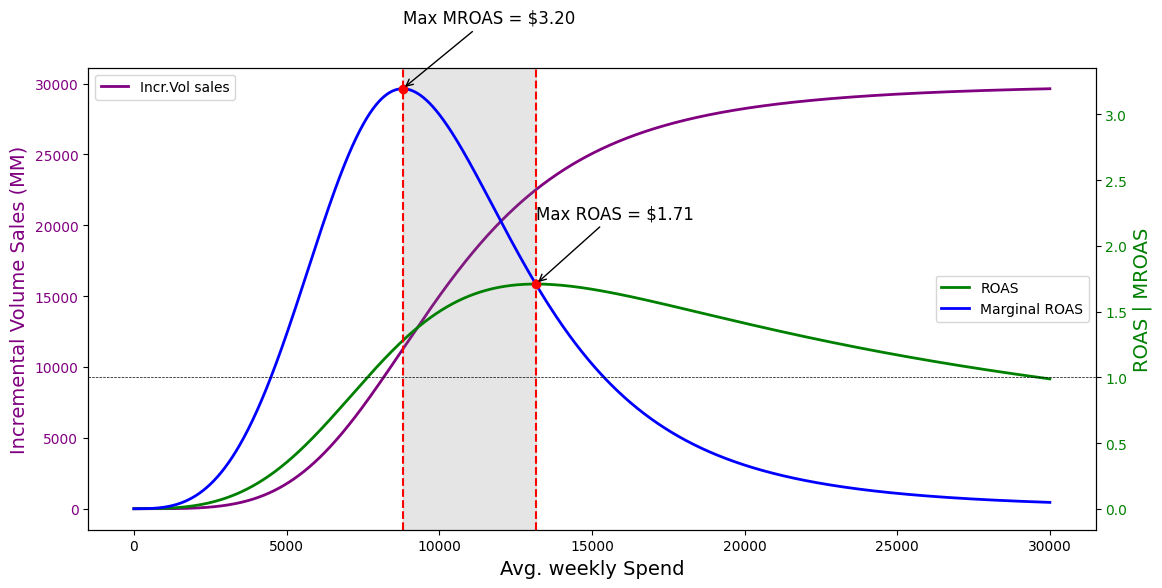

In [8]:
fig, ax1 = plt.subplots(figsize=(13, 6))
# Plot Incremental Volume Sales (dashed line)
ax1.plot(x, y_incremental_volume, label='Incr.Vol sales', color='purple', linewidth=2)
ax1.set_xlabel('Avg. weekly Spend', fontsize=14)
ax1.set_ylabel('Incremental Volume Sales (MM)', fontsize=14, color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.legend(loc='upper left')

 # Plot ROAS (solid green line)
cost_per_GRP = 1  # Assume $1 per GRP for simplicity
ad_spend = x * cost_per_GRP
y_roas = y_incremental_volume / ad_spend
y_roas[0] = 0  # Avoid division by zero


y_roas_second_derivative = roas_second_derivative(x, K, S)
first_inflection_point = find_first_inflection_point(x, y_roas_second_derivative)
# ax1.axvline(x=first_inflection_point, color='red', linestyle='--', label='First Inflection Point')

max_roas_frequency, max_roas_value = find_max_roas(x, y_roas)

ax2 = ax1.twinx()
ax2.plot(x, y_roas, label='ROAS', color='green', linewidth=2)
ax2.set_ylabel('ROAS | MROAS', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')


# Plot Marginal ROAS (solid blue line)
y_marginal_roas = beta*hill_derivative(x, K, S) / cost_per_GRP
max_mroas_frequency, max_mroas_value = find_max_roas(x, y_marginal_roas)

# first_inflection_point = find_first_inflection_point(x, y_roas_second_derivative)

ax2.plot(x, y_marginal_roas, linestyle='-', label='Marginal ROAS', color='blue', linewidth=2)
ax2.legend(loc='center right')

# Highlight optimal range
plt.axvspan(max_mroas_frequency, max_roas_frequency, color='grey', alpha=0.2, label='Optimal Range')

# Highlight the maximum ROAS point
ax2.plot(max_roas_frequency, max_roas_value, 'ro')  # Red dot at max ROAS point
ax2.plot(max_mroas_frequency, max_mroas_value, 'ro')  # Red dot at max ROAS point

ax2.annotate(f'Max ROAS = ${max_roas_value:.2f}', 
             xy=(max_roas_frequency, max_roas_value),
             xytext=(max_roas_frequency+ 1 , max_roas_value+0.5 ),
             arrowprops=dict(facecolor='black', arrowstyle='->'), 
            fontsize=12)


ax2.annotate(f'Max MROAS = ${max_mroas_value:.2f}', 
             xy=(max_mroas_frequency, max_mroas_value),
             xytext=(max_mroas_frequency , max_mroas_value + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), 
            fontsize=12)

ax2.axvline(max_roas_frequency,color='red',linestyle='--')
ax2.axvline(max_mroas_frequency,color='red',linestyle='--',label='max marginal roas')
ax2.axhline(1,color='black',linestyle='--',lw=0.5)


plt.show()
plt.close()

